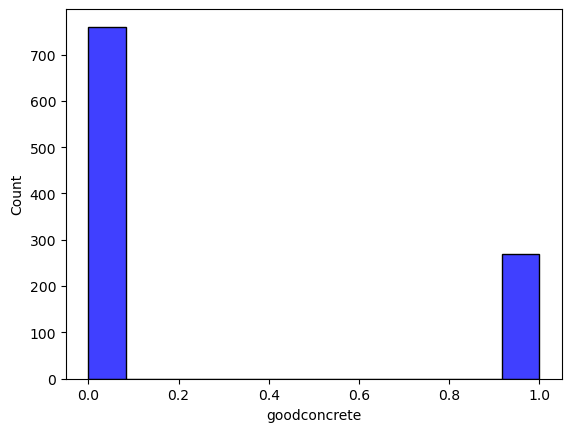

In [21]:
## Apr 1, 2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/maajdl/Yeh-concrete-data-sklearn/raw/master/Concrete_Data_Yeh.csv')
df['goodconcrete']=(df.csMPa>45).astype(int)
sns.histplot(df['goodconcrete'], color='blue', kde=False)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

x_val = df.drop(['csMPa', 'goodconcrete'], axis=1)
y_val = df['goodconcrete']

X_train, X_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

good = y_pred == 1  # use 1 to represent good concrete
print("Good concrete (True/False):", good)

Accuracy: 0.7896440129449838
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       232
           1       0.59      0.49      0.54        77

    accuracy                           0.79       309
   macro avg       0.72      0.69      0.70       309
weighted avg       0.78      0.79      0.78       309

Good concrete (True/False): [ True  True  True  True False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False  True False  True  True  True
 False False False False False False False  True False False False False
 False False False  True False False False False False False False False
 False False False False  True  True  True False False  True False False
  True  True False False False False False  True False False False False
 False Fa

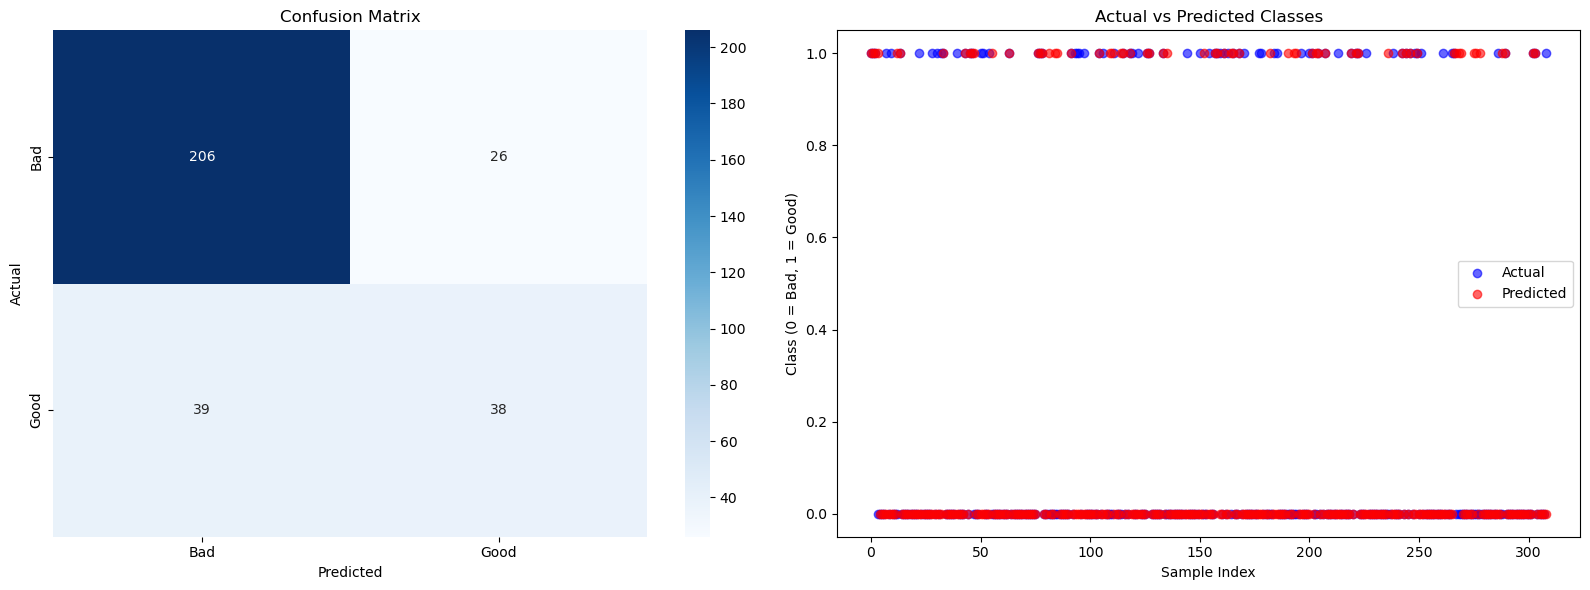

In [17]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

axes[1].scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
axes[1].scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Class (0 = Bad, 1 = Good)')
axes[1].set_title('Actual vs Predicted Classes')
axes[1].legend()

plt.tight_layout()
plt.show()